<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/btp_clg_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
plt.style.use('dark_background')


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


# 0 - Tumor
# 1 - Normal
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
paths = []

for r, d, f in os.walk(r'/content/gdrive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(2891, 224, 224, 3)

In [7]:
result = np.array(result)
result = result.reshape(2891,2)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [9]:
model1 = Sequential()
model1.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=4096,activation="relu"))
model1.add(Dense(units=2, activation="softmax"))

from tensorflow.keras.optimizers import Adam 
opt = Adam(lr=0.001)
model1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
from keras.models import Sequential
model2.add(Flatten())
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4096, activation= 'relu'))
model2.add(Dense(1000, activation= 'relu'))
model2.add(Dense(2, activation='softmax'))
from tensorflow.keras.optimizers import Adam 
opt = Adam(lr=0.001)
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
y_train.shape

(1734, 2)

In [12]:
history1 = model1.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 50s 705ms/step - loss: 68.5076 - accuracy: 0.5311 - val_loss: 0.9186 - val_accuracy: 0.5017
Epoch 2/100
44/44 [==============================] - 26s 587ms/step - loss: 0.7036 - accuracy: 0.5363 - val_loss: 0.6950 - val_accuracy: 0.5087
Epoch 3/100
44/44 [==============================] - 26s 598ms/step - loss: 0.6955 - accuracy: 0.5017 - val_loss: 0.6876 - val_accuracy: 0.5554
Epoch 4/100
44/44 [==============================] - 27s 605ms/step - loss: 0.8214 - accuracy: 0.5525 - val_loss: 0.6976 - val_accuracy: 0.4913
Epoch 5/100
44/44 [==============================] - 27s 614ms/step - loss: 0.6881 - accuracy: 0.6107 - val_loss: 0.6097 - val_accuracy: 0.6886
Epoch 6/100
44/44 [==============================] - 27s 620ms/step - loss: 0.5418 - accuracy: 0.7255 - val_loss: 0.5305 - val_accuracy: 0.7353
Epoch 7/100
44/44 [==============================] - 27s 615ms/step - loss: 0.5136 - accuracy: 0.7474 - val_loss: 0.5471 - val_accuracy

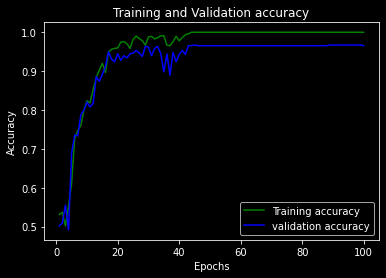

In [13]:
# print(history)
loss_train1 = history1.history['accuracy']
loss_val1 = history1.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train1, 'g', label='Training accuracy')
plt.plot(epochs, loss_val1, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
print("Evaluate on test data")
results1 = model1.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results1)

Evaluate on test data
10/10 [==============================] - 3s 257ms/step - loss: 0.9292 - accuracy: 0.9499
test loss, test acc: [0.9292410612106323, 0.9499136209487915]


In [15]:
history2 = model2.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val))

Epoch 1/100
44/44 [==============================] - 40s 862ms/step - loss: 88.1419 - accuracy: 0.4971 - val_loss: 0.6916 - val_accuracy: 0.5087
Epoch 2/100
44/44 [==============================] - 37s 839ms/step - loss: 0.7349 - accuracy: 0.4937 - val_loss: 0.6930 - val_accuracy: 0.5087
Epoch 3/100
44/44 [==============================] - 37s 837ms/step - loss: 0.6878 - accuracy: 0.5208 - val_loss: 0.6696 - val_accuracy: 0.6955
Epoch 4/100
44/44 [==============================] - 37s 844ms/step - loss: 0.9275 - accuracy: 0.5421 - val_loss: 0.6932 - val_accuracy: 0.4913
Epoch 5/100
44/44 [==============================] - 37s 839ms/step - loss: 0.6935 - accuracy: 0.5046 - val_loss: 0.6928 - val_accuracy: 0.5087
Epoch 6/100
44/44 [==============================] - 37s 840ms/step - loss: 0.7208 - accuracy: 0.5196 - val_loss: 0.6589 - val_accuracy: 0.7163
Epoch 7/100
44/44 [==============================] - 37s 838ms/step - loss: 0.6990 - accuracy: 0.5369 - val_loss: 0.6796 - val_accuracy

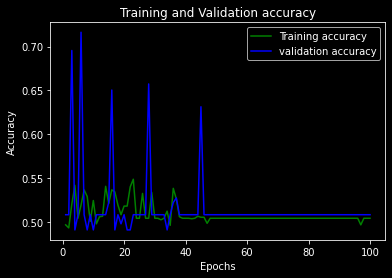

In [16]:
loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train2, 'g', label='Training accuracy')
plt.plot(epochs, loss_val2, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
print("Evaluate on test data")
results2 = model2.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results2)

Evaluate on test data
10/10 [==============================] - 4s 343ms/step - loss: 0.6929 - accuracy: 0.5147
test loss, test acc: [0.692890465259552, 0.5146805047988892]


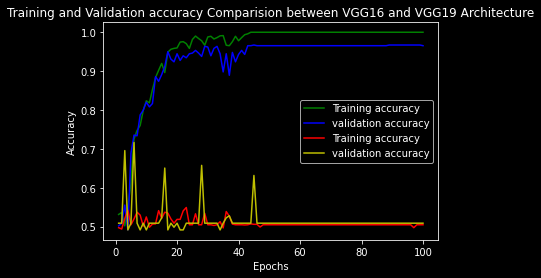

In [19]:
loss_train1 = history1.history['accuracy']
loss_val1 = history1.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train1, 'g', label='Training accuracy')
plt.plot(epochs, loss_val1, 'b', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']
plt.plot(epochs, loss_train2, 'r', label='Training accuracy')
plt.plot(epochs, loss_val2, 'y', label='validation accuracy')
plt.title('Training and Validation accuracy Comparision between VGG16 and VGG19 Architecture')
plt.legend()
plt.show()